<a href="https://colab.research.google.com/github/PSheva/neural-networks/blob/main/NN_lab4_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
import time
from tensorflow import keras

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

CLASS_NAMES = ['airplane','automobilde','bird','cat','deer','dog','frog','horse','ship','duck']


test_x, test_y = train_x[:5000], train_y[:5000]
train_x, train_y = train_x[5000:], train_y[5000:]




In [ ]:
train_x[0].shape

(32, 32, 3)

In [ ]:
# train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
# test_ds = tf.data.Dataset.from_tensor_slices((test_x, test_y))
# validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

In [ ]:
model = tf.keras.Sequential([
    
    layers.Conv2D(32, (7, 7), padding="same", activation='relu', input_shape=(train_x[0].shape)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (5, 5), padding="same",activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(128, (5, 5), padding="same",activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(256, (3, 3), padding="same",activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(256, (3, 3), padding="same",activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(2048, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        4736      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 batch_normalization_12 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                      

In [ ]:
hist_data = model.fit(train_x, train_y, epochs=10, batch_size=128, validation_data=(test_x,test_y))

Epoch 1/10
352/352 [==============================] - 327s 928ms/step - loss: 0.8053 - accuracy: 0.7183 - val_loss: 1.0604 - val_accuracy: 0.6180
Epoch 2/10
352/352 [==============================] - 313s 890ms/step - loss: 0.7002 - accuracy: 0.7569 - val_loss: 0.9932 - val_accuracy: 0.6536
Epoch 3/10
352/352 [==============================] - 309s 877ms/step - loss: 0.6067 - accuracy: 0.7921 - val_loss: 0.9221 - val_accuracy: 0.6766
Epoch 4/10
352/352 [==============================] - 343s 975ms/step - loss: 0.5246 - accuracy: 0.8198 - val_loss: 1.0320 - val_accuracy: 0.6616
Epoch 5/10
352/352 [==============================] - 362s 1s/step - loss: 0.4418 - accuracy: 0.8518 - val_loss: 1.5544 - val_accuracy: 0.5700
Epoch 6/10
352/352 [==============================] - 346s 983ms/step - loss: 0.3631 - accuracy: 0.8821 - val_loss: 1.2773 - val_accuracy: 0.6270
Epoch 7/10
352/352 [==============================] - 340s 965ms/step - loss: 0.2886 - accuracy: 0.9095 - val_loss: 1.0256 - va

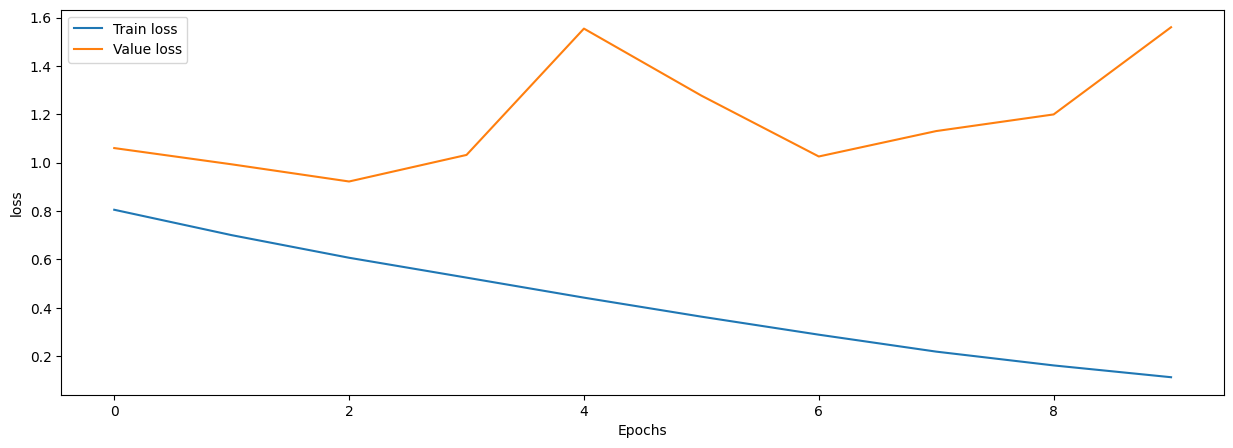

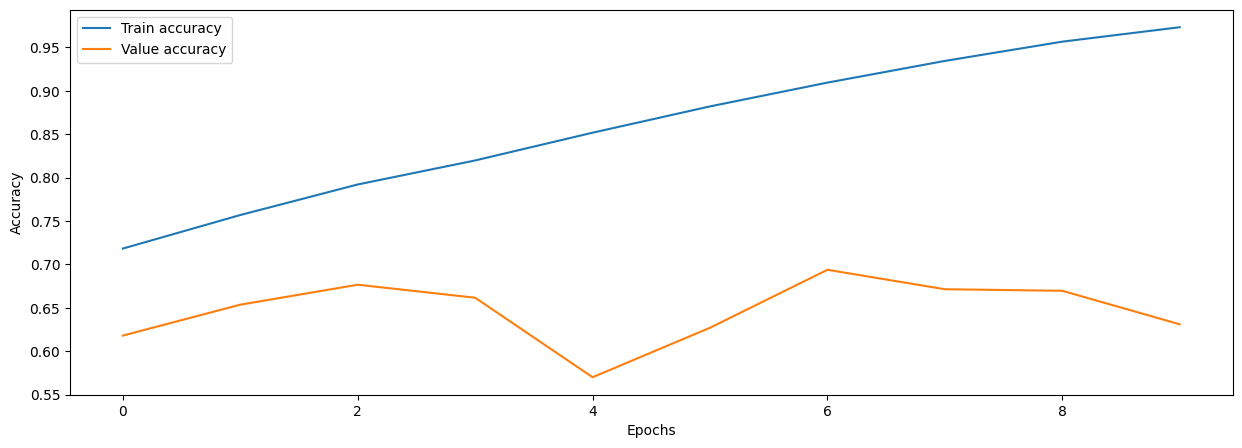

In [ ]:
def plot_hist(hist_data):
  plt.figure(figsize=(15,5))
  plt.plot(hist_data.history['loss'], label='Train loss')
  plt.plot(hist_data.history['val_loss'], label='Value loss')
  plt.xlabel('Epochs')
  plt.ylabel('loss')
  plt.legend()

  plt.figure(figsize=(15,5))
  plt.plot(hist_data.history['accuracy'], label='Train accuracy')
  plt.plot(hist_data.history['val_accuracy'], label='Value accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

plot_hist(hist_data)


1/1 [==============================] - 0s 19ms/step


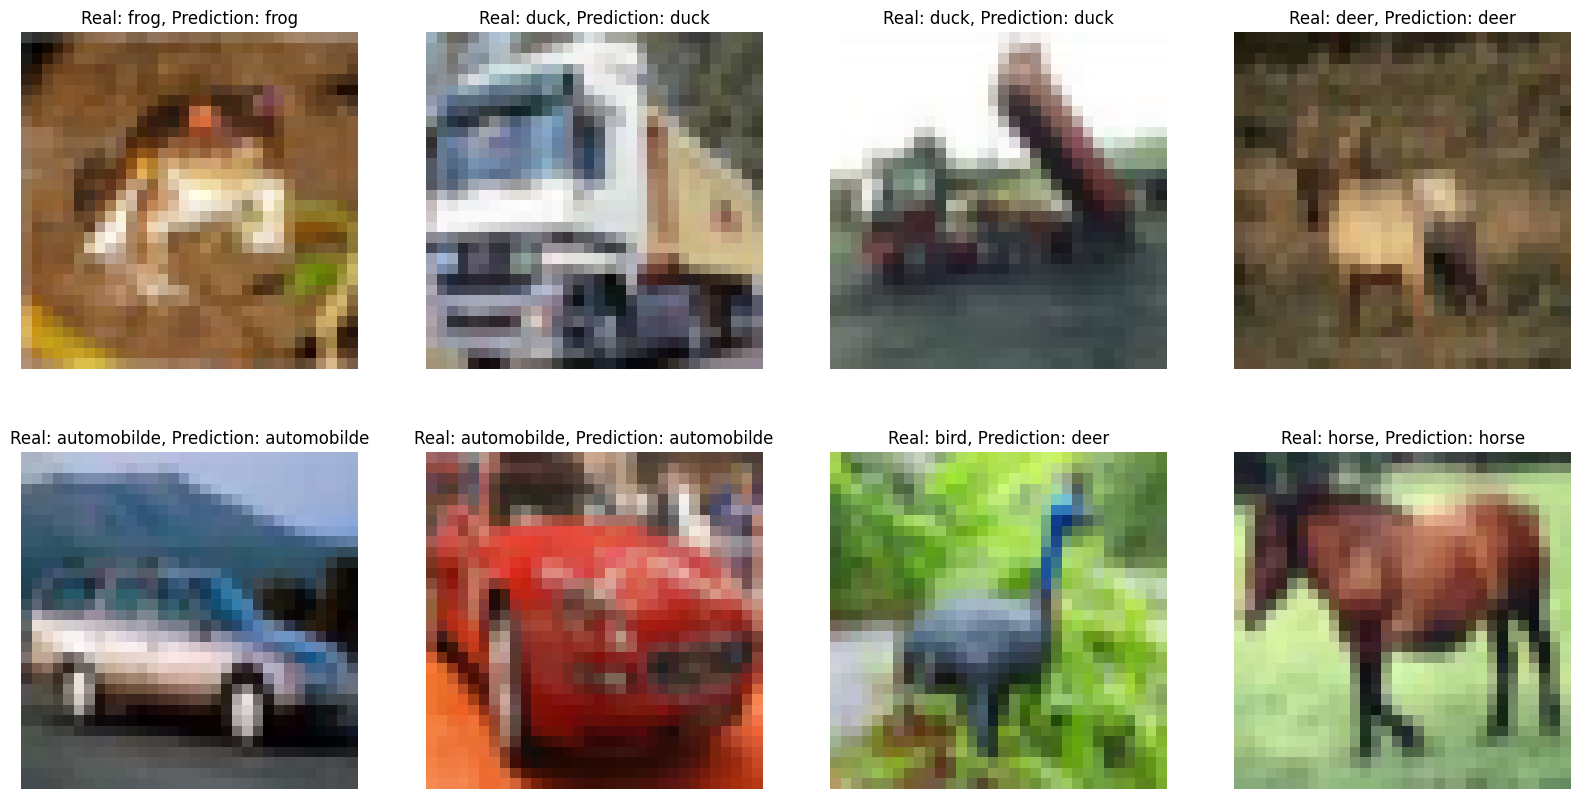

In [ ]:
plt.figure(figsize=(20,10))

for i in range(8):
  image = test_x[i]
  real_label = CLASS_NAMES[test_y[i][0]]

  image = np.reshape(image, (1,32,32,3))
  prediction = model.predict(image)
  prediction_label= CLASS_NAMES[(np.argmax(prediction))]
  plt.subplot(2,4,i+1)
  plt.imshow(test_x[i])
  plt.title(f'Real: {real_label}, Prediction: {prediction_label}')
  plt.axis('off')

plt.show()

